# Installations

In [ ]:
!pip install Epitran
!pip install eng_to_ipa
!pip install panphon
!pip install -U PyYAML
!pip install googletrans
!pip install googletrans==3.1.0a0

In [ ]:
!pip install seaborn

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import panphon
import panphon.distance
import editdistance # levenshtein
import epitran
import eng_to_ipa as eng
from epitran.backoff import Backoff
from googletrans import Translator
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
epitran.download.cedict()

# Epitran

In [ ]:
epi = epitran.Epitran('eng-Latn')

In [ ]:
epi = epitran.Epitran('uig-Arab')

In [ ]:
print(epi.transliterate(u'Düğün'))

In [ ]:
eng.convert("Tyler")

In [ ]:
epi = epitran.Epitran('fas-Arab')

epi.transliterate("همیشه")
epi.transliterate("هر روز")
epi.transliterate("اصرار ورزیدن")
epi.transliterate("اتفاق")
epi.transliterate("اِتِّفَاقَيْنِ")

In [ ]:
epi_hin = epitran.Epitran('hin-Deva')
print(epi_hin.transliterate("इत्तफ़ाक़"))

# Edit distance

In [229]:
ft = panphon.FeatureTable()

In [300]:
ft_names = [1,0,-1]
ft.word_fts(u'swit')
a = ft.word_to_vector_list(u'təslliː	', numeric=True)


In [278]:
a = ft.word_fts('bɣɒvt	')
 

In [304]:
flat_list = [item for sublist in a for item in sublist]
len(flat_list)

144

In [308]:
a= np.array(flat_list)
a 

array([-1, -1,  1, -1, -1, -1, -1,  0, -1, -1, -1,  1,  1, -1, -1, -1, -1,
       -1, -1, -1,  0, -1,  0,  0,  1,  1, -1,  1, -1, -1, -1,  0,  1, -1,
       -1,  0, -1,  0, -1, -1, -1,  1, -1, -1, -1, -1,  0,  0, -1, -1,  1,
        1, -1, -1, -1,  0, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1,
        0, -1,  0,  0, -1,  1,  1,  1, -1,  1, -1,  0,  1, -1, -1,  1,  1,
       -1, -1, -1, -1, -1, -1, -1,  0, -1,  0,  0, -1,  1,  1,  1, -1,  1,
       -1,  0,  1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0,
        0,  1,  1, -1,  1, -1, -1, -1,  0,  1, -1, -1,  0, -1,  0, -1,  1,
       -1, -1, -1, -1,  1,  1,  0,  0])

In [385]:
Epi_result

,loan_word,original_word,loan_word_epitran,original_word_epitran,fast levenshtein,Dolgo prime distance,Feature edit distance,Hamming feature distance,Weighted feature distance,Fast Levenshtein distance div maxlen,label,features_loan,features_orig
0,तसल्ली,بغاوت,təslliː,bɣɒvt,6,7,2.020833,2.291667,19.1250,1.000000,0,"[-1, -1, 1, -1, -1, -1, -1, 0, -1, -1, -1, 1, ...","[-1, -1, 1, -1, -1, -1, -1, 0, 1, -1, -1, 1, -..."
1,ख़राश,طرفدار,xəraːʃ,trfdɒr,5,6,1.916667,2.333333,16.5625,1.000000,0,"[-1, -1, 1, 1, -1, -1, -1, 0, -1, -1, -1, -1, ...","[-1, -1, 1, -1, -1, -1, -1, 0, -1, -1, -1, 1, ..."
2,चिराग़,نقاب,t͡ʃiraːɣ,nɣɒb,4,8,1.625000,1.833333,13.5625,1.000000,0,"[-1, -1, 1, -1, 1, -1, -1, 0, -1, -1, -1, -1, ...","[-1, 1, 1, -1, -1, -1, 1, 0, 1, -1, -1, 1, 1, ..."
3,मरहम,شوهر,mərɦəm,ʃvhr,4,6,2.625000,3.083333,21.2500,1.000000,0,"[-1, 1, 1, -1, -1, -1, 1, 0, 1, -1, -1, 1, -1,...","[-1, -1, 1, 1, -1, -1, -1, 0, -1, -1, -1, -1, ..."
4,हैवानियत,خُوشنَوِیسی,ɦæːvaːnijət,xُvʃnowejsj,5,10,2.833333,3.125000,25.7500,0.909091,0,"[-1, 1, 1, 1, -1, -1, -1, 0, 1, -1, -1, -1, -1...","[-1, -1, 1, 1, -1, -1, -1, 0, -1, -1, -1, -1, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14779,तहसील,تحصیل,təɦsiːl,thsjl,2,4,1.062500,1.208333,8.8125,0.571429,1,"[-1, -1, 1, -1, -1, -1, -1, 0, -1, -1, -1, 1, ...","[-1, -1, 1, -1, -1, -1, -1, 0, -1, -1, -1, 1, ..."
14780,तीर,برفی,tiːr,brfj,3,4,1.562500,1.916667,13.2500,1.000000,0,"[-1, -1, 1, -1, -1, -1, -1, 0, -1, -1, -1, 1, ...","[-1, -1, 1, -1, -1, -1, -1, 0, 1, -1, -1, 1, -..."
14781,सितारा,قید,sitaːraː,ɣjd,5,8,2.979167,3.416667,24.2500,1.000000,0,"[-1, -1, 1, 1, -1, -1, -1, 0, -1, -1, -1, 1, 1...","[-1, -1, 1, 1, -1, -1, -1, 0, 1, -1, -1, -1, -..."
14782,सबूत,کبابه چینی,səbuːt,kbɒbh t͡ʃjnj,7,10,4.291667,4.750000,34.3750,0.833333,0,"[-1, -1, 1, 1, -1, -1, -1, 0, -1, -1, -1, 1, 1...","[-1, -1, 1, -1, -1, -1, -1, 0, -1, -1, -1, -1,..."


In [382]:
#Epi_result['features_loan'] = Epi_result.apply(lambda x:ft.word_to_vector_list(x["loan_word_epitran"],numeric=True ), axis=1)
Epi_result['features_orig'] = Epi_result.apply(lambda x:ft.word_to_vector_list(x["original_word_epitran"],numeric=True ), axis=1)

In [384]:
#make a flat list of the features for both orig and loan words
#Epi_result['features_loan'] = Epi_result['features_loan'].apply(lambda x:sum(x, []))
Epi_result['features_orig'] = Epi_result['features_orig'].apply(lambda x:sum(x, []))

In [320]:
max_len_loan = Epi_result.loan_word_epitran.map(lambda x: len(ft.word_to_vector_list(x))).max()
max_len_orig = Epi_result.original_word_epitran.map(lambda x: len(ft.word_to_vector_list(x))).max()

In [386]:
#pad_idx = Epi_result['features_loan'].apply(len)
pad_idx = Epi_result['features_orig'].apply(len)
pad_idx = np.array(pad_idx)
pad_idx

array([120, 144,  96, ...,  72, 216,  96])

In [388]:
arr = np.asarray(Epi_result['features_orig'])
type(arr)

numpy.ndarray

In [387]:
def padarray(A, size):
    t = size - len(A)
    return np.pad(A, pad_width=(0, t), mode='constant')

In [349]:
padarray(arr, max_len_loan*24)

ValueError: index can't contain negative values

In [369]:
#padding for loan words 
l = []
for i in range(len(arr)):
    a = padarray(arr[i], max_len_loan*24)
    l.append(a)

In [389]:
#padding for original words


l2 = []
for i in range(len(arr)):
    a = padarray(arr[i], max_len_orig*24)
    l2.append(a)

In [380]:
l = np.array(l)
l.shape
%store l
%store Epi_result


Stored 'l' (ndarray)
Stored 'Epi_result' (DataFrame)


In [392]:
l2 = np.array(l2)
l2.shape, l.shape
l_comb = np.concatenate((l, l2), axis=1)



In [394]:
l_comb.shape
%store l_comb

Stored 'l_comb' (ndarray)


In [376]:
df = pd.DataFrame()
df['column_name']=pd.Series(l)
#Epi_result['features_loan'] = 

Exception: Data must be 1-dimensional

In [371]:
 
l = pd.DataFrame(l, columns=['features_loan_padded'])
l

ValueError: 1 columns passed, passed data had 288 columns

In [332]:
for i in Epi_result['features_loan']:
    np.pad(x, (0,max_len_loan*24 - pad_idx ), 'constant', constant_values=(0))
    
    
    

 

[-1, -1, 1, -1, -1, -1, -1, 0, -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1, 0, -1, 0, 0, 1, 1, -1, 1, -1, -1, -1, 0, 1, -1, -1, 0, -1, 0, -1, -1, -1, 1, -1, -1, -1, -1, 0, 0, -1, -1, 1, 1, -1, -1, -1, 0, -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1, 0, -1, 0, 0, -1, 1, 1, 1, -1, 1, -1, 0, 1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1, 0, -1, 0, 0, -1, 1, 1, 1, -1, 1, -1, 0, 1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1, 0, -1, 0, 0, 1, 1, -1, 1, -1, -1, -1, 0, 1, -1, -1, 0, -1, 0, -1, 1, -1, -1, -1, -1, 1, 1, 0, 0]
[-1, -1, 1, 1, -1, -1, -1, 0, -1, -1, -1, -1, -1, 0, -1, 1, -1, 1, -1, -1, 0, -1, 0, 0, 1, 1, -1, 1, -1, -1, -1, 0, 1, -1, -1, 0, -1, 0, -1, -1, -1, 1, -1, -1, -1, -1, 0, 0, -1, 1, 1, 1, 0, -1, -1, 0, 1, -1, -1, 1, 1, -1, -1, 0, 0, 0, -1, -1, 0, -1, 0, 0, 1, 1, -1, 1, -1, -1, -1, 0, 1, -1, -1, 0, -1, 0, -1, -1, 1, -1, -1, -1, 1, 1, 0, 0, -1, -1, 1, 1, -1, -1, -1, 0, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, 0, -1, 0, 0]
[-1, -1, 1, -1, 1, -1, -1, 0, -1, -1, -1, -1, 1, 1, -1

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [340]:
#pad it to max length of loan and original word ipa

Epi_result['features_loan'] = Epi_result['features_loan'].apply(lambda x:np.pad(x, (0,max_len_loan*24 - pad_idx ), 'constant', constant_values=(0))) 

TypeError: `pad_width` must be of integral type.

In [321]:
len(Epi_result['features_loan'])

14784

In [324]:
a = Epi_result['features_loan'].apply(len)
a

0        144
1        120
2        120
3        144
4        216
        ... 
14779    144
14780     72
14781    144
14782    120
14783    120
Name: features_loan, Length: 14784, dtype: int64

In [319]:
print(Epi_result.loan_word_epitran.map(lambda x: len(ft.word_to_vector_list(x))).max())

12


In [ ]:
print(epi.transliterate(x["loan_word"]), axis=1)

In [256]:
import epitran.vector

In [258]:
vwis = epitran.vector.VectorsWithIPASpace('hin-Deva')

TypeError: __init__() missing 1 required positional argument: 'space_names'

In [264]:
epi = epitran.Epitran('hin-Deva')

In [265]:
epi.word_to_tuples(u'təslliː')

[('L',
  0,
  't',
  '',
  [(-1,
    [0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0])]),
 ('L',
  0,
  'ə',
  '',
  [(-1,
    [0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0])]),
 ('L',
  0,
  's',
  '',
  [(-1,
    [0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0])]),
 ('L',
  0,
  'l',
  '',
  [(-1,
    [0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0])]),
 ('L',
  0,
  'l',
  '',
  [(-1,
    [0,
     0,
     0,
     0,
     0,
     0,
   

In [2]:
dst = panphon.distance.Distance()

In [ ]:
df_translated = pd.read_csv('translated.csv')
df_translated['hin_loanwords'][1]

In [ ]:
df_translated

In [ ]:
df_translated
ipa_hin =[]
ipa_per = []
epi_hin = epitran.Epitran('hin-Deva')
for i in range(len(df_translated)):
    #print(df_translated['hin_loanwords'][i])
    ipa_hin.append(epi_hin.transliterate(df_translated['hin_loanwords'][i]))
    if i == 235:
        break

In [ ]:
epi = epitran.Epitran('fas-Arab')    
for i in range(len(df_translated)):
    #print(df_translated['hin_loanwords'][i])
    print
    ipa_per.append(epi.transliterate(df_translated['farsi'][i]))
    if i ==235:
        break

In [ ]:
ipa_per

In [ ]:
edit_dist_weighted = []
for i in range(len(ipa_per)):
    edit_dist_weighted.append(dst.weighted_feature_edit_distance(ipa_per[i], ipa_hin[i]))
    
    #edit_dist.extend(dst.weighted_feature_edit_distance(ipa_hin[i], ipa_per[i]))

In [ ]:
np.array(edit_dist_weighted).mean()

In [ ]:
np.array(edit_dist_weighted).std()

In [ ]:
sum(edit_dist_weighted)/len(edit_dist_weighted)

In [ ]:
print(dst.levenshtein_distance(u'hmjʃh', u'ɦəmeʃaː'))
print(dst.fast_levenshtein_distance(u'hmjʃh', u'ɦəmeʃaː'))
#print(dst.dolgo_prime_distance(u'hmjʃh', u'ɦəmeʃaː'))
#print(dst.dolgo_prime_distance('hmjʃh', 'motor'))
print(dst.feature_edit_distance('hmjʃh', 'ɦəmeʃaː'))

print(dst.feature_edit_distance('hmjʃh', 'motor'))

#interesting one here ! 
print("Check the ones below!")
print(editdistance.eval("hmjʃh", "ɦəmeʃaː"))
print(dst.hamming_feature_edit_distance('hmjʃh', 'ɦəmeʃaː')) #loan word

print(dst.hamming_feature_edit_distance('hmjʃh', 'ˈtaɪlər')) #random 
print(dst.hamming_feature_edit_distance('hmjʃh', 'düğün')) #some random word
print(dst.hamming_feature_edit_distance('hmjʃh', 'hr rvz')) #everyday or roz or har roz
print(dst.hamming_feature_edit_distance('hmjʃh', 'ɒsrɒr vrzjdn'))

print(dst.weighted_feature_edit_distance('hmjʃh', 'ɦəmeʃaː'))
print(dst.weighted_feature_edit_distance('hmjʃh', 'ɒsrɒr vrzjdn'))
print(dst.weighted_feature_edit_distance('hmjʃh', 'hr rvz'))

print("Random word distance", dst.weighted_feature_edit_distance('ittəfaːq', 'ɒsrɒr vrzjdn'))
print("Random word distance", dst.weighted_feature_edit_distance('ittəfaːq', 'hr rvz'))
print("IPA from Epitran", dst.weighted_feature_edit_distance('ittəfaːq', 'ɒtfɒɣj'))
print("IPA from wiktionary", dst.weighted_feature_edit_distance('ittəfaːq', 'it.ti.faːq'))
print("IPA from wiktionary-Arabic", dst.weighted_feature_edit_distance('ittəfaːq', 'aِtِّfَaːq'))
print("IPA from wiktionary-Arabic", dst.weighted_feature_edit_distance('ittəfaːq', 'aِtِّfَaːqَiːْnِ'))

In [ ]:
dst

In [3]:
dst.dolgo_prime_distance(u'pops', u'bobz')

AttributeError: 'Distance' object has no attribute 'dolgo_prime_distance'

In [ ]:
dst.dolgo_prime_distance(u'pops', u'bobo')

In [ ]:
dst.fast_levenshtein_distance_div_maxlen(u'pops', u'bobo')

In [ ]:
def iterative_levenshtein(s, t):
    """ 
        iterative_levenshtein(s, t) -> ldist
        ldist is the Levenshtein distance between the strings 
        s and t.
        For all i and j, dist[i,j] will contain the Levenshtein 
        distance between the first i characters of s and the 
        first j characters of t
    """

    rows = len(s)+1
    cols = len(t)+1
    dist = [[0 for x in range(cols)] for x in range(rows)]

    # source prefixes can be transformed into empty strings 
    # by deletions:
    for i in range(1, rows):
        dist[i][0] = i

    # target prefixes can be created from an empty source string
    # by inserting the characters
    for i in range(1, cols):
        dist[0][i] = i
        
    for col in range(1, cols):
        for row in range(1, rows):
            if s[row-1] == t[col-1]:
                cost = 0
            else:
                cost = 1
            dist[row][col] = min(dist[row-1][col] + 1,      # deletion
                                 dist[row][col-1] + 1,      # insertion
                                 dist[row-1][col-1] + cost) # substitution

    # for r in range(rows):
    #     print(dist[r])
    
 
    return dist[row][col]

In [ ]:
print(iterative_levenshtein("hmjʃh", "ɦəmeʃaː"))

In [ ]:
editdistance.eval("hmjʃh", "ɦəmeʃaː")

In [ ]:
!pip install openpyxl

In [ ]:
import openpyxl
import os

# Translation

In [ ]:
#df1 = pd.read_excel("hindi_q.xlsx")
df1 = pd.read_excel(
     os.path.join("hindi_q.xlsx"),
     engine='openpyxl',
)

In [ ]:
df1 

In [ ]:
keys = [c for c in df1 if c.startswith('Deva' )]
keys = [c for c in keys if 'href' not in c]
keys

In [ ]:
df2 = pd.melt(df1,  value_vars=keys, value_name='hin_loanwords')

In [ ]:
df2 = df2.dropna()
df2.to_csv('hindi_loanwords')

In [ ]:
for i in df2['hin_loanwords']:
    print(i)

In [ ]:
translator = Translator()

In [ ]:
translator.translate("Der Himmel ist blau und ich mag Bananen", dest='en').text

# Looping

In [ ]:
dst = panphon.distance.Distance()

In [ ]:
edit_dists = [dst.fast_levenshtein_distance, dst.dolgo_prime_distance, \
              dst.feature_edit_distance, dst.hamming_feature_edit_distance, dst.weighted_feature_edit_distance, \
              dst.fast_levenshtein_distance_div_maxlen]
edit_dists_names = ["fast levenshtein", "Dolgo prime distance", \
                    "Feature edit distance", "Hamming feature distance", "Weighted feature distance", \
                    "Fast Levenshtein distance div maxlen"]

In [4]:
edit_dists = [dst.dogol_prime_distance, dst.fast_levenshtein_distance, dst.feature_edit_distance, dst.hamming_feature_edit_distance, dst.weighted_feature_edit_distance, \
              dst.fast_levenshtein_distance_div_maxlen]

In [5]:
edit_dists_names = ["fast levenshtein", "Dolgo prime distance", \
                    "Feature edit distance", "Hamming feature distance", "Weighted feature distance", \
                    "Fast Levenshtein distance div maxlen"]

example of distances using two words "hmjʃh" and "motor"


In [6]:
for dist, name  in zip(edit_dists, edit_dists_names):
  print(f"{name} : {dist('hmjʃh', 'motor')}")

fast levenshtein : 3
Dolgo prime distance : 5
Feature edit distance : 1.4375
Hamming feature distance : 1.6666666666666667
Weighted feature distance : 13.8125
Fast Levenshtein distance div maxlen : 1.0


In [173]:
hindi_persian = pd.read_csv("Hindi-Persian.csv")
hindi_persian.head()

,loan_word,original_word,loan_word_ipas,original_word_ipas
0,अंगूर,انگور,['/əŋ.ɡuːɾ/'],"['/anɡuːɾ/', '/anɡuːɾ/', '/ænɡuːɾ/', '/anɡuɾ/'..."
1,अंगूरी,انگوری,['/əŋ.ɡuː.ɾiː/'],['/əŋ.ɡuː.ɾiː/']
2,अंजाम,انجام,['/ən.d͡ʒɑːm/'],"['/and͡ʒɑːm/', '/and͡ʒɒːm/', '/ænd͡ʒɒːm/', '/a..."
3,अंदर,اندر,['/ən.d̪əɾ/'],['/andur/']
4,अंदरुनी,اندرونی,['/ən.d̪ə.ɾʊ.niː/'],[]


In [174]:
hindi_persian = hindi_persian.drop(["original_word_ipas", "loan_word_ipas"], axis=1)

In [175]:
Epi_hindi_persian = hindi_persian.copy()

In [176]:
#create hard negatives by rolling the loan word column by a x amount and concating it to the end of df to create a train and test split 
new = []

for i in range(0,50,5):
    print(i)
    Epi_hindi_persian.loan_word = np.roll(Epi_hindi_persian.loan_word, i+5 )
    new.append(Epi_hindi_persian)
    
    print(new)
   
 

0
[     loan_word original_word
0        हैरान         انگور
1        हैवान        انگوری
2     हैवानियत         انجام
3      होशियार          اندر
4        हौसला       اندرونی
...        ...           ...
1339  हुक्मरान         حیران
1340    हुज़ूर         حیوان
1341      हुनर       حیوانیت
1342     हुस्न        هوشیار
1343      हैरत         حوصله

[1344 rows x 2 columns]]
5
[        loan_word original_word
0          हिम्मत         انگور
1          हिरासत        انگوری
2           हिलाल         انجام
3           हिसाब          اندر
4          हुकूमत       اندرونی
...           ...           ...
1339        हिंदी         حیران
1340  हिंदुस्तानी         حیوان
1341        हिकमत       حیوانیت
1342        हिजरत        هوشیار
1343       हिज्जे         حوصله

[1344 rows x 2 columns],         loan_word original_word
0          हिम्मत         انگور
1          हिरासत        انگوری
2           हिलाल         انجام
3           हिसाब          اندر
4          हुकूमत       اندرونی
...           ... 

In [177]:
Epi_result = pd.concat(new)

In [178]:
Epi_result = pd.concat([hindi_persian, Epi_result])

In [236]:
Epi_result

,loan_word,original_word,loan_word_epitran,original_word_epitran,fast levenshtein,Dolgo prime distance,Feature edit distance,Hamming feature distance,Weighted feature distance,Fast Levenshtein distance div maxlen,label
0,तसल्ली,بغاوت,təslliː,bɣɒvt,6,7,2.020833,2.291667,19.1250,1.000000,0
1,ख़राश,طرفدار,xəraːʃ,trfdɒr,5,6,1.916667,2.333333,16.5625,1.000000,0
2,चिराग़,نقاب,t͡ʃiraːɣ,nɣɒb,4,8,1.625000,1.833333,13.5625,1.000000,0
3,मरहम,شوهر,mərɦəm,ʃvhr,4,6,2.625000,3.083333,21.2500,1.000000,0
4,हैवानियत,خُوشنَوِیسی,ɦæːvaːnijət,xُvʃnowejsj,5,10,2.833333,3.125000,25.7500,0.909091,0
...,...,...,...,...,...,...,...,...,...,...,...
14779,तहसील,تحصیل,təɦsiːl,thsjl,2,4,1.062500,1.208333,8.8125,0.571429,1
14780,तीर,برفی,tiːr,brfj,3,4,1.562500,1.916667,13.2500,1.000000,0
14781,सितारा,قید,sitaːraː,ɣjd,5,8,2.979167,3.416667,24.2500,1.000000,0
14782,सबूत,کبابه چینی,səbuːt,kbɒbh t͡ʃjnj,7,10,4.291667,4.750000,34.3750,0.833333,0


## Working with EpiTran's IPAs

In [180]:
epi = epitran.Epitran('hin-Deva')

In [181]:
Epi_result["loan_word_epitran"] = Epi_result.apply(lambda x:epi.transliterate(x["loan_word"]), axis=1)

In [182]:
epi = epitran.Epitran('fas-Arab')

In [183]:
Epi_result["original_word_epitran"] = Epi_result.apply(lambda x:epi.transliterate(x["original_word"]), axis=1)

In [188]:
Epi_result.head()

,loan_word,original_word,loan_word_epitran,original_word_epitran
0,अंगूर,انگور,ŋɡuːr,ɒŋvr
1,अंगूरी,انگوری,ŋɡuːriː,ɒŋvrj
2,अंजाम,انجام,ɲd͡ʒaːm,ɒnd͡ʒɒm
3,अंदर,اندر,ndər,ɒndr
4,अंदरुनी,اندرونی,ndəruniː,ɒndrvnj


In [205]:
Epi_hindi_persian_raw = Epi_result 

In [186]:
Epi_hindi_persian = hindi_persian.drop(["original_word_ipas", "loan_word_ipas"], axis=1)

KeyError: "['original_word_ipas' 'loan_word_ipas'] not found in axis"

In [200]:
Epi_hindi_persian.shape

(14784, 10)

In [191]:
for dist, name  in zip(edit_dists, edit_dists_names):
    Epi_hindi_persian[name] = Epi_hindi_persian.apply(lambda x:dist(x["loan_word_epitran"], x["original_word_epitran"]), axis=1)

In [192]:
Epi_hindi_persian.head()

,loan_word,original_word,loan_word_epitran,original_word_epitran,fast levenshtein,Dolgo prime distance,Feature edit distance,Hamming feature distance,Weighted feature distance,Fast Levenshtein distance div maxlen
0,अंगूर,انگور,ŋɡuːr,ɒŋvr,3,4,0.770833,0.875000,9.1875,0.800000
1,अंगूरी,انگوری,ŋɡuːriː,ɒŋvrj,4,6,0.895833,1.041667,10.6250,0.857143
2,अंजाम,انجام,ɲd͡ʒaːm,ɒnd͡ʒɒm,1,4,1.166667,1.291667,8.8125,0.571429
3,अंदर,اندر,ndər,ɒndr,2,2,0.791667,0.916667,9.5000,0.500000
4,अंदरुनी,اندرونی,ndəruniː,ɒndrvnj,4,5,1.229167,1.458333,14.9375,0.625000


In [206]:
Epi_hindi_persian = Epi_hindi_persian_raw.iloc[:1344]

In [395]:
Epi_hindi_persian_raw

,loan_word,original_word,loan_word_epitran,original_word_epitran,fast levenshtein,Dolgo prime distance,Feature edit distance,Hamming feature distance,Weighted feature distance,Fast Levenshtein distance div maxlen
0,अंगूर,انگور,ŋɡuːr,ɒŋvr,3,4,0.770833,0.875000,9.1875,0.800000
1,अंगूरी,انگوری,ŋɡuːriː,ɒŋvrj,4,6,0.895833,1.041667,10.6250,0.857143
2,अंजाम,انجام,ɲd͡ʒaːm,ɒnd͡ʒɒm,1,4,1.166667,1.291667,8.8125,0.571429
3,अंदर,اندر,ndər,ɒndr,2,2,0.791667,0.916667,9.5000,0.500000
4,अंदरुनी,اندرونی,ndəruniː,ɒndrvnj,4,5,1.229167,1.458333,14.9375,0.625000
...,...,...,...,...,...,...,...,...,...,...
1339,रिवाज,حیران,rivaːd͡ʒ,hjrɒn,3,8,0.895833,1.166667,7.1250,1.000000
1340,रिश्ता,حیوان,riʃtaː,hjvɒn,4,6,1.312500,1.625000,12.0000,1.000000
1341,रिश्वत,حیوانیت,riʃvət,hjvɒnjt,4,6,1.833333,2.208333,14.6875,0.857143
1342,रिश्वतख़ोर,هوشیار,riʃvətxor,hvʃjɒr,4,7,3.062500,3.458333,26.4375,0.777778


In [208]:
Epi_hindi_persian.shape
Epi_hindi_persian_ =Epi_hindi_persian_raw.iloc[1344:len(Epi_hindi_persian_raw)]

In [19]:
Epi_hindi_persian_ = Epi_hindi_persian.copy()
Epi_hindi_persian_ = Epi_hindi_persian_.drop(edit_dists_names , axis=1)
idx = np.random.permutation(Epi_hindi_persian_.index)
Epi_hindi_persian_["original_word"] = Epi_hindi_persian_["original_word"].reindex(idx).reset_index(drop=True)
Epi_hindi_persian_["original_word_epitran"] = Epi_hindi_persian_["original_word_epitran"].reindex(idx).reset_index(drop=True)

In [20]:
Epi_hindi_persian["label"] = 1
Epi_hindi_persian_["label"] = 0
for dist, name  in zip(edit_dists, edit_dists_names):
    Epi_hindi_persian_[name] = Epi_hindi_persian_.apply(lambda x:dist(x["loan_word_epitran"], x["original_word_epitran"]), axis=1)

In [209]:
Epi_hindi_persian["label"] = 1
Epi_hindi_persian_["label"] = 0
Epi_hindi_persian_.head()

/s/chopin/d/proj/ramfis-aida/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/s/chopin/d/proj/ramfis-aida/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,loan_word,original_word,loan_word_epitran,original_word_epitran,fast levenshtein,Dolgo prime distance,Feature edit distance,Hamming feature distance,Weighted feature distance,Fast Levenshtein distance div maxlen,label
0,रिहा,انگور,riɦaː,ɒŋvr,4,5,1.020833,1.375000,11.2500,1.000000,0
1,रिहाई,انگوری,riɦaːiː,ɒŋvrj,5,7,1.145833,1.541667,12.6875,1.000000,0
2,रुख़,انجام,rux,ɒnd͡ʒɒm,4,7,2.437500,2.708333,19.3750,1.000000,0
3,रुख़सार,اندر,ruxsaːr,ɒndr,3,6,2.291667,2.583333,18.8125,0.857143,0
4,रूद,اندرونی,ruːd,ɒndrvnj,6,6,4.062500,4.500000,34.5000,0.857143,0


In [210]:
Epi_hindi_persian.head()

,loan_word,original_word,loan_word_epitran,original_word_epitran,fast levenshtein,Dolgo prime distance,Feature edit distance,Hamming feature distance,Weighted feature distance,Fast Levenshtein distance div maxlen,label
0,अंगूर,انگور,ŋɡuːr,ɒŋvr,3,4,0.770833,0.875000,9.1875,0.800000,1
1,अंगूरी,انگوری,ŋɡuːriː,ɒŋvrj,4,6,0.895833,1.041667,10.6250,0.857143,1
2,अंजाम,انجام,ɲd͡ʒaːm,ɒnd͡ʒɒm,1,4,1.166667,1.291667,8.8125,0.571429,1
3,अंदर,اندر,ndər,ɒndr,2,2,0.791667,0.916667,9.5000,0.500000,1
4,अंदरुनी,اندرونی,ndəruniː,ɒndrvnj,4,5,1.229167,1.458333,14.9375,0.625000,1


In [211]:
print(Epi_hindi_persian.shape)
print(Epi_hindi_persian_.shape)

(1344, 11)
(13440, 11)


In [212]:
Epi_result = pd.concat([Epi_hindi_persian, Epi_hindi_persian_])
Epi_result = shuffle(Epi_result).reset_index(drop=True)
Epi_result.head()

,loan_word,original_word,loan_word_epitran,original_word_epitran,fast levenshtein,Dolgo prime distance,Feature edit distance,Hamming feature distance,Weighted feature distance,Fast Levenshtein distance div maxlen,label
0,तसल्ली,بغاوت,təslliː,bɣɒvt,6,7,2.020833,2.291667,19.1250,1.000000,0
1,ख़राश,طرفدار,xəraːʃ,trfdɒr,5,6,1.916667,2.333333,16.5625,1.000000,0
2,चिराग़,نقاب,t͡ʃiraːɣ,nɣɒb,4,8,1.625000,1.833333,13.5625,1.000000,0
3,मरहम,شوهر,mərɦəm,ʃvhr,4,6,2.625000,3.083333,21.2500,1.000000,0
4,हैवानियत,خُوشنَوِیسی,ɦæːvaːnijət,xُvʃnowejsj,5,10,2.833333,3.125000,25.7500,0.909091,0


In [214]:
Epi_result.shape

(14784, 11)

In [120]:
hindi_persian.head()

,loan_word,original_word,loan_word_ipas,original_word_ipas
0,अंगूर,انگور,['/əŋ.ɡuːɾ/'],"['/anɡuːɾ/', '/anɡuːɾ/', '/ænɡuːɾ/', '/anɡuɾ/'..."
1,अंगूरी,انگوری,['/əŋ.ɡuː.ɾiː/'],['/əŋ.ɡuː.ɾiː/']
2,अंजाम,انجام,['/ən.d͡ʒɑːm/'],"['/and͡ʒɑːm/', '/and͡ʒɒːm/', '/ænd͡ʒɒːm/', '/a..."
3,अंदर,اندر,['/ən.d̪əɾ/'],['/andur/']
4,अंदरुनी,اندرونی,['/ən.d̪ə.ɾʊ.niː/'],[]


In [108]:
#create hard negatives by rolling the loan word column by a x amount and concating it to the end of df to create a train and test split 
new = []

for i in range(0,50,5):
    print(i)
    Epi_hindi_persian.loan_word = np.roll(Epi_hindi_persian.loan_word, i+5 )
    new.append(Epi_hindi_persian)
    
    print(new)
   
 

0
[     loan_word original_word
0        हैरान         انگور
1        हैवान        انگوری
2     हैवानियत         انجام
3      होशियार          اندر
4        हौसला       اندرونی
...        ...           ...
1339  हुक्मरान         حیران
1340    हुज़ूर         حیوان
1341      हुनर       حیوانیت
1342     हुस्न        هوشیار
1343      हैरत         حوصله

[1344 rows x 2 columns]]
5
[        loan_word original_word
0          हिम्मत         انگور
1          हिरासत        انگوری
2           हिलाल         انجام
3           हिसाब          اندر
4          हुकूमत       اندرونی
...           ...           ...
1339        हिंदी         حیران
1340  हिंदुस्तानी         حیوان
1341        हिकमत       حیوانیت
1342        हिजरत        هوشیار
1343       हिज्जे         حوصله

[1344 rows x 2 columns],         loan_word original_word
0          हिम्मत         انگور
1          हिरासत        انگوری
2           हिलाल         انجام
3           हिसाब          اندر
4          हुकूमत       اندرونی
...           ... 

In [127]:
Epi_result = pd.concat(new)

In [130]:
Epi_result = pd.concat([Epi_hindi_persian, Epi_result])

In [135]:
Epi_hindi_persian = Epi_result
Epi_hindi_persian

,loan_word,original_word
0,अंगूर,انگور
1,अंगूरी,انگوری
2,अंजाम,انجام
3,अंदर,اندر
4,अंदरुनी,اندرونی
...,...,...
1339,रिवाज,حیران
1340,रिश्ता,حیوان
1341,रिश्वत,حیوانیت
1342,रिश्वतख़ोर,هوشیار


In [136]:
for dist, name  in zip(edit_dists, edit_dists_names):
    Epi_hindi_persian[name] = Epi_hindi_persian.apply(lambda x:dist(x["loan_word_epitran"], x["original_word_epitran"]), axis=1)

KeyError: 'loan_word_epitran'

In [215]:
dist_arr = np.array(edit_dists_names).reshape(-1,3)
dist_arr

array([['fast levenshtein', 'Dolgo prime distance',
        'Feature edit distance'],
       ['Hamming feature distance', 'Weighted feature distance',
        'Fast Levenshtein distance div maxlen']], dtype='<U36')

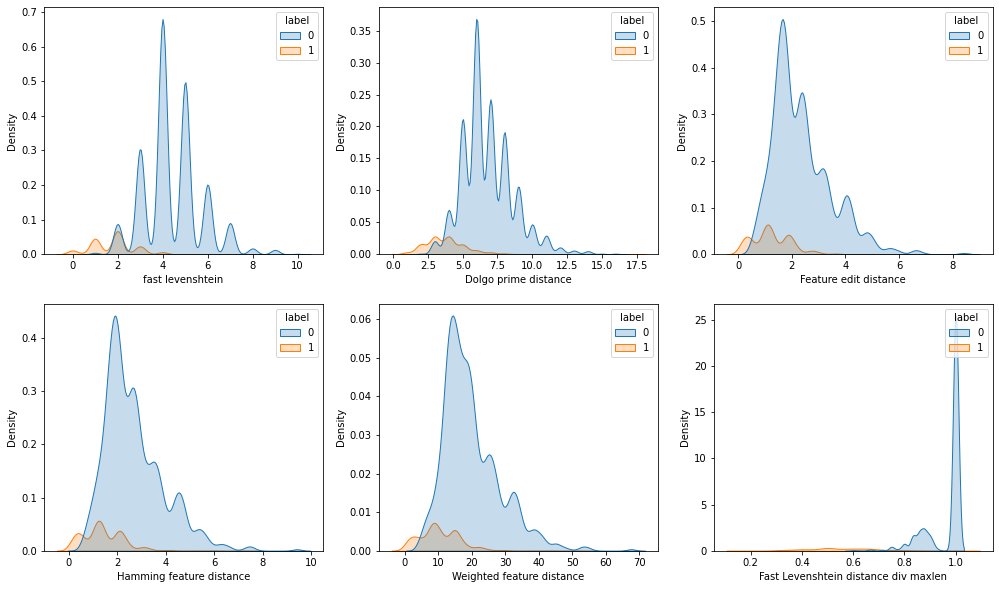

In [216]:
f, axs = plt.subplots(len(dist_arr), len(dist_arr[0]), figsize=(17,10))
for i in range(len(dist_arr)):
    for j in range(len(dist_arr[0])):
        sns.kdeplot(data= Epi_result, x=dist_arr[i,j], hue="label", shade=1, ax=axs[i][j], legend=True)

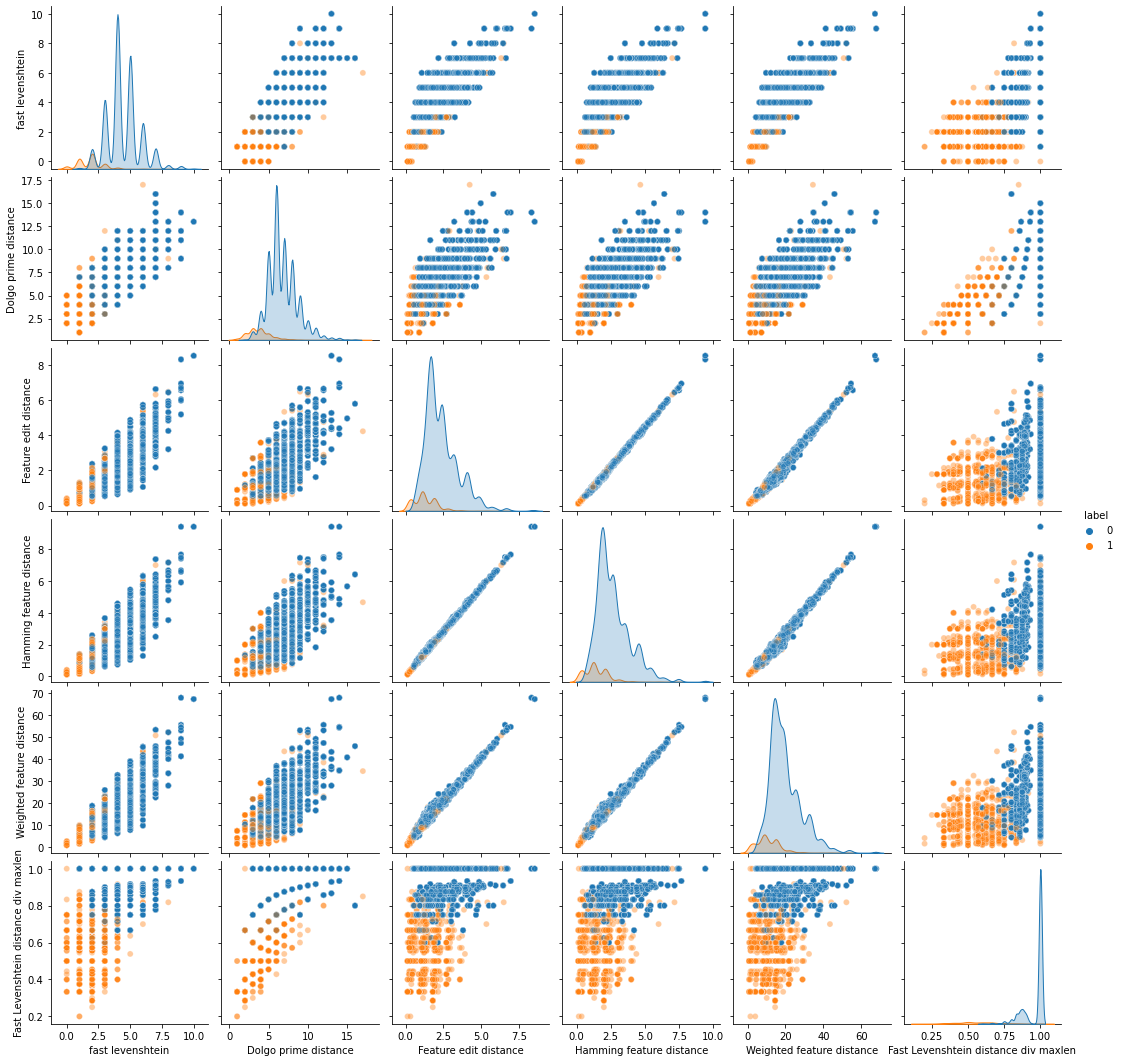

In [217]:
sns.pairplot(data=Epi_result, hue='label',plot_kws={'alpha':0.4})

In [218]:
Epi_result.head()

,loan_word,original_word,loan_word_epitran,original_word_epitran,fast levenshtein,Dolgo prime distance,Feature edit distance,Hamming feature distance,Weighted feature distance,Fast Levenshtein distance div maxlen,label
0,तसल्ली,بغاوت,təslliː,bɣɒvt,6,7,2.020833,2.291667,19.1250,1.000000,0
1,ख़राश,طرفدار,xəraːʃ,trfdɒr,5,6,1.916667,2.333333,16.5625,1.000000,0
2,चिराग़,نقاب,t͡ʃiraːɣ,nɣɒb,4,8,1.625000,1.833333,13.5625,1.000000,0
3,मरहम,شوهر,mərɦəm,ʃvhr,4,6,2.625000,3.083333,21.2500,1.000000,0
4,हैवानियत,خُوشنَوِیسی,ɦæːvaːnijət,xُvʃnowejsj,5,10,2.833333,3.125000,25.7500,0.909091,0


In [219]:
clf = LogisticRegression().fit(Epi_result[['fast levenshtein']], Epi_result["label"])

In [220]:
Epi_result.head(3)

,loan_word,original_word,loan_word_epitran,original_word_epitran,fast levenshtein,Dolgo prime distance,Feature edit distance,Hamming feature distance,Weighted feature distance,Fast Levenshtein distance div maxlen,label
0,तसल्ली,بغاوت,təslliː,bɣɒvt,6,7,2.020833,2.291667,19.1250,1.0,0
1,ख़राश,طرفدار,xəraːʃ,trfdɒr,5,6,1.916667,2.333333,16.5625,1.0,0
2,चिराग़,نقاب,t͡ʃiraːɣ,nɣɒb,4,8,1.625000,1.833333,13.5625,1.0,0


In [221]:
clf.predict(np.array(Epi_result['fast levenshtein'][:4]).reshape(-1,1))

array([0, 0, 0, 0])

## Working with Wiktionary's IPAs

In [ ]:
Wiki_hindi_persian = pd.read_csv("Hindi-Persian.csv")

In [ ]:
Wiki_hindi_persian = Wiki_hindi_persian[Wiki_hindi_persian["original_word_ipas"]!="[]"]
Wiki_hindi_persian = Wiki_hindi_persian[Wiki_hindi_persian["loan_word_ipas"]!="[]"]

In [ ]:
Wiki_hindi_persian.head()

In [ ]:
Wiki_hindi_persian.shape

In [ ]:
for dist, name  in zip(edit_dists, edit_dists_names):
    Wiki_hindi_persian[name] = Wiki_hindi_persian.apply(lambda x:min([dist(i, j) for i in str(x["loan_word_ipas"]).strip('][').split(", ") for j in str(x["original_word_ipas"]).strip('][').split(", ")]), axis=1)

In [ ]:
Wiki_hindi_persian.head()

In [ ]:
Wiki_hindi_persian_ = Wiki_hindi_persian.copy()
Wiki_hindi_persian_ = Wiki_hindi_persian_.drop(edit_dists_names , axis=1)
idx = np.random.permutation(Wiki_hindi_persian_.index)
Wiki_hindi_persian_["original_word"] = Wiki_hindi_persian_["original_word"].reindex(idx).reset_index(drop=True)
Wiki_hindi_persian_["original_word_ipas"] = Wiki_hindi_persian_["original_word_ipas"].reindex(idx).reset_index(drop=True)

In [ ]:
Wiki_hindi_persian["label"] = 1
Wiki_hindi_persian_["label"] = 0
for dist, name  in zip(edit_dists, edit_dists_names):
    Wiki_hindi_persian_[name] = Wiki_hindi_persian_.apply(lambda x:min([dist(i, j) for i in str(x["loan_word_ipas"]).strip('][').split(", ") for j in str(x["original_word_ipas"]).strip('][').split(", ")]), axis=1)

In [ ]:
Wiki_hindi_persian_.head()

In [ ]:
Wiki_hindi_persian.head()

In [ ]:
Wiki_result = pd.concat([Wiki_hindi_persian, Wiki_hindi_persian_])
Wiki_result = shuffle(Wiki_result).reset_index(drop=True)
Wiki_result.head()

In [ ]:
dist_arr = np.array(edit_dists_names).reshape(-1,3)
dist_arr

In [ ]:
f, axs = plt.subplots(len(dist_arr), len(dist_arr[0]), figsize=(17,10))
for i in range(len(dist_arr)):
    for j in range(len(dist_arr[0])):
        sns.kdeplot(data= Wiki_result, x=dist_arr[i,j], hue="label", shade=1, ax=axs[i][j], legend=True)

In [ ]:
sns.pairplot(data=Wiki_result, hue='label',plot_kws={'alpha':0.4})
sns.set(rc={'figure.figsize':(40,40)})